# Rankine Cycle Example

## Imports

In [3]:
from thermostate import State, Q_, units, SystemInternational as SI
from thermostate.plotting import IdealGas, VaporDome
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

---

## Definitions

In [4]:
substance = 'water'
T_1 = Q_(560.0, 'degC')
p_1 = Q_(16.0, 'MPa')
mdot_1 = Q_(120.0, 'kg/s')
p_2 = Q_(1.0, 'MPa')
p_3 = Q_(8.0, 'kPa')
x_4 = Q_(0.0, 'percent')
x_6 = Q_(0.0, 'percent')
p_low = Q_(0.1, 'MPa')
p_high = Q_(7.5, 'MPa')

---

## Problem Statement

Water is the working fluid in an ideal regenerative Rankine cycle with one open feedwater heater. Superheated vapor enters the first-stage turbine at 16.0 MPa, 560.0 celsius with a mass flow rate of 120.0 kg/s. Steam expands through the first-stage turbine to 1.0 MPa where it is extracted and diverted to the open feedwater heater. The remainder expands through the second-stage turbine to the condenser pressure of 8.0 kPa. Saturated liquid exits the feedwater heater at 1.0 MPa. Determine

1. the net power developed, in MW
2. the rate of heat transfer to the steam passing through the boiler, in MW
3. the overall cycle thermal efficiency
4. For extraction pressures ($p_2$) ranging from $p_{low} =$ 0.1 MPa to $p_{high} =$ 7.5 MPa, calculate the extracted mass fraction $y$ and the overall cycle thermal efficiency. Sketch a plot of $\eta$ (on the y-axis) vs. $y$ (on the x-axis). Use at least 10 values to construct the plot. **Discuss any trends you find.**

---

## Hint

To do the plotting, we will construct a list that contains pressures from 0.1 MPa to 7.5 MPa and use a `for` loop to iterate over that list. As we do the iteration, we will fix the values for the states that have changed, and re-compute $y$ and $\eta$ on each iteration. We will store the value for $y$ and $\eta$ at each pressure in a list, then plot the lists. 

To create the list of pressures, we will use a function from the `numpy` library called `linspace` that creates a range of numbers when the start, stop, and number of values are input. If we multiply the range by the `units` that we want, it will work out. Note: Not all of the state change every time the extraction pressure is changed. You only need to recompute the states that change. The code will look something like this:

```python
y_values = []
eta_values = []
for p_2 in linspace(p_low, p_high, 10)*units.MPa:
    # State 2 is definitely going to change :-)
    st_2 = State(substance, p=p_2, s=s_2)
    
    # Now fix the rest of the states that have changed
    ...
    y = ...
    y_values.append(y)
    
    Wdot_net = ...
    Qdot_in = ...
    eta = ...
    eta_values.append(eta)
    
plt.plot(y_values, eta_values, label='eta')
plt.legend(loc='best')
plt.title('$\eta$ vs. $y$')
plt.xlabel('$y$ ($\dot{m}_2/\dot{m}_1$)')
plt.ylabel('$\eta$');
```

The syntax for the plotting function is

```python
plt.plot(x_values, y_values, label='line label name')
```

The rest of the code below the plotting is to make the plot look nicer. Feel free to copy-paste this code into your solution.

---

## Solution

### 1. the net power developed

The first step is to fix all of the states, then calculate the value for $y$.

In [5]:
# State 1
st_1 = State(substance, T=T_1, p=p_1)
h_1 = st_1.h.to(SI.h)
s_1 = st_1.s.to(SI.s)

# State 2
s_2 = s_1
st_2 = State(substance, p=p_2, s=s_2)
h_2 = st_2.h.to(SI.h)
T_2 = st_2.T.to(SI.T)
x_2 = st_2.x

# State 3
s_3 = s_2
st_3 = State(substance, p=p_3, s=s_3)
h_3 = st_3.h.to(SI.h)
T_3 = st_3.T.to(SI.T)
x_3 = st_3.x

# State 4
p_4 = p_3
st_4 = State(substance, p=p_4, x=x_4)
h_4 = st_4.h.to(SI.h)
s_4 = st_4.s.to(SI.s)
T_4 = st_4.T.to(SI.T)

# State 5
p_5 = p_2
s_5 = s_4
st_5 = State(substance, p=p_5, s=s_5)
h_5 = st_5.h.to(SI.h)
T_5 = st_5.T.to(SI.T)

# State 6
p_6 = p_2
st_6 = State(substance, p=p_6, x=x_6)
h_6 = st_6.h.to(SI.h)
s_6 = st_6.s.to(SI.s)
T_6 = st_6.T.to(SI.T)

# State 7
p_7 = p_1
s_7 = s_6
st_7 = State(substance, p=p_7, s=s_7)
h_7 = st_7.h.to(SI.h)
T_7 = st_7.T.to(SI.T)

y = (h_6 - h_5)/(h_2 - h_5)

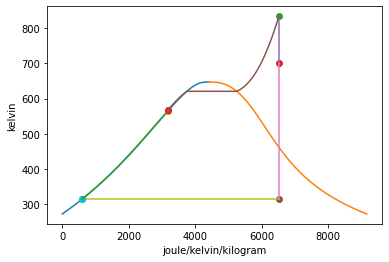

In [12]:
Rankine = VaporDome(substance, ('s', 'T'))

Rankine.add_process(st_1, st_2, 'isentropic')
Rankine.add_process(st_2, st_3, 'isentropic')
Rankine.add_process(st_3, st_4, 'isobaric')
Rankine.add_process(st_4, st_5, 'isentropic')
Rankine.add_process(st_5, st_6, 'isobaric')
Rankine.add_process(st_6, st_7, 'isentropic')
Rankine.add_process(st_7, st_1, 'isobaric')

Summarizing the states:

| State |               T                |               p                |               h                |               s                |               x                |     phase      |
|-------|--------------------------------|--------------------------------|--------------------------------|--------------------------------|--------------------------------|----------------|
|     1 | 560.00 celsius | 16.00 MPa | 3467.17 kJ/kg | 6.5163 kJ/(K kg) | ---                            | supercritical |
|     2 | 179.88 celsius | 1.00 MPa | 2745.98 kJ/kg | 6.5163 kJ/(K kg) | 98.45% | twophase |
|     3 | 41.51 celsius | 8.00 kPa | 2037.82 kJ/kg | 6.5163 kJ/(K kg) | 77.59% | twophase |
|     4 | 41.51 celsius | 8.00 kPa | 173.84 kJ/kg | 0.5925 kJ/(K kg) | 0.00% pct | twophase |
|     5 | 41.54 celsius | 1.00 MPa | 174.84 kJ/kg | 0.5925 kJ/(K kg) | ---                            | liquid |
|     6 | 179.88 celsius | 1.00 MPa | 762.52 kJ/kg | 2.1381 kJ/(K kg) | 0.00% pct | twophase |
|     7 | 181.95 celsius | 16.00 MPa | 779.35 kJ/kg | 2.1381 kJ/(K kg) | ---                            | liquid |


This gives a value for $y =$ 0.2286 = 22.86% of the flow being directed into the feedwater heater. Then, the net work output of the cycle is

\begin{align*}
\dot{W}_{net} &= \dot{m}_1(h_1 - h_2) + \dot{m}_3(h_2 - h_3) + \dot{m}_3(h_4 - h_5) + \dot{m}_1(h_6 - h_7) \\
\dot{W}_{net} &= \dot{m}_1\left[(h_1 - h_2) + (1 - y)(h_2 - h_3) + (1 - y)(h_4 - h_5) + (h_6 - h_7)\right]
\end{align*}

In [7]:
Wdot_net = (mdot_1*(h_1 - h_2 + (1 - y)*(h_2 - h_3) + (1 - y)*(h_4 - h_5) + (h_6 - h_7))).to('MW')

<div class="alert alert-success">

**Answer:** The net work output from the cycle is $\dot{W}_{net} =$ 149.99 MW

</div>

### 2. the heat transfer input

The heat transfer input is

$$\dot{Q}_{in} = \dot{m}_1(h_1 - h_7)$$

In [8]:
Qdot_in = (mdot_1*(h_1 - h_7)).to('MW')

<div class="alert alert-success">

**Answer:** The heat transfer input is $\dot{Q}_{in} =$ 322.54 MW

</div>

### 3. the overall cycle thermal efficiency

In [9]:
eta = Wdot_net/Qdot_in

<div class="alert alert-success">

**Answer:** The thermal efficiency is $\eta =$ 0.4650 = 46.50%

</div>

### 4. plot $\eta$ vs $y$

In [10]:
p_range = np.linspace(p_low, p_high, 100)
y_values = np.zeros(shape=p_range.shape) * units.dimensionless
eta_values = np.zeros(shape=p_range.shape) * units.dimensionless
for i, p_2 in enumerate(p_range):
    # State 2
    s_2 = s_1
    st_2 = State(substance, p=p_2, s=s_2)
    h_2 = st_2.h

    # State 5
    p_5 = p_2
    s_5 = s_4
    st_5 = State(substance, p=p_5, s=s_5)
    h_5 = st_5.h

    # State 6
    p_6 = p_2
    st_6 = State(substance, p=p_6, x=x_6)
    h_6 = st_6.h
    s_6 = st_6.s

    # State 7
    p_7 = p_1
    s_7 = s_6
    st_7 = State(substance, p=p_7, s=s_7)
    h_7 = st_7.h
    
    y = (h_6 - h_5)/(h_2 - h_5)
    y_values[i] = y

    Wdot_net = (mdot_1*(h_1 - h_2 + (1 - y)*(h_2 - h_3) + (1 - y)*(h_4 - h_5) + (h_6 - h_7))).to('MW')
    Qdot_in = (mdot_1*(h_1 - h_7)).to('MW')
    eta = Wdot_net/Qdot_in
    eta_values[i] = eta

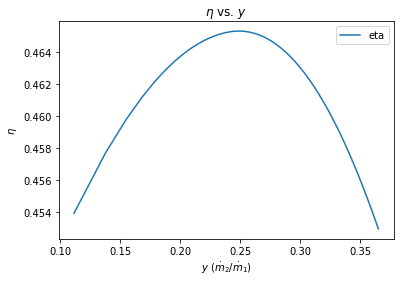

In [11]:
plt.plot(y_values, eta_values, label='eta')
plt.legend(loc='best')
plt.title('$\eta$ vs. $y$')
plt.xlabel('$y$ ($\dot{m}_2/\dot{m}_1$)')
plt.ylabel('$\eta$');

<div class="alert alert-success">

**Answer:** Interestingly, as we vary the mass flow rate extracted to the feedwater heater, the overall thermal efficiency first increases, then decreases. The reason is because the thermal efficiency is the ratio of the work divided by the heat transfer. As $y$ increases from 0.10 to 0.20, the work output decreases slightly, but the heat transfer decreases significantly. After about $y =$ 0.25, the work output decreases more quickly than the heat transfer decreases, and the thermal efficiency goes down.

</div>